### W207 Final Project - Forest Coverage Classification

#### Team members: Emily, Mohan, Stefania

The project and data is from https://www.kaggle.com/c/forest-cover-type-prediction/overview

We chose to use the K-Nearest Neighbors Classifier for the baseline.

### Introduction

For our final project we set out to create a model that could predict the forest cover type based on a dataset of cartographic variables. The datasets and full project description can be found on Kaggle (https://www.kaggle.com/c/forest-cover-type-prediction/overview). In order to find the best model, we followed these steps:
1. Download and clean up data
2. Create a baseline model to compare future iterations against
3. Perform exploratory data analysis on key variables
4. Pre-process data
5. Feature engineering
6. Test various models



In [2]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
1
2
3
4
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Download and separate data

In [3]:
# Read the data

df = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

# Rename columns
df.columns = ["Id", "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points",
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4",
    "Soil_Type1",  "Soil_Type2",  "Soil_Type3",  "Soil_Type4",  "Soil_Type5",  "Soil_Type6",
    "Soil_Type7",  "Soil_Type8",  "Soil_Type9",  "Soil_Type10", "Soil_Type11", "Soil_Type12",
    "Soil_Type13", "Soil_Type14", "Soil_Type15", "Soil_Type16", "Soil_Type17",
    "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22",
    "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27",
    "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32",
    "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37",
    "Soil_Type38", "Soil_Type39", "Soil_Type40", "Cover_Type"]


In [4]:
# Seperating features (X) and labels (y)
from sklearn.model_selection import train_test_split

df = df.drop(["Id"], axis = 1)
test_data = test_data.drop(["Id"], axis = 1)

X, y = df.drop(["Cover_Type"], axis = 1), df["Cover_Type"]

train_data, dev_data, train_data_label, dev_data_label = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print('train_data shape: ',train_data.shape)
print('train_data_labels shape: ',train_data_label.shape)
print('dev_data shape: ',dev_data.shape)
print('dev_data_labels shape: ',dev_data_label.shape)

train_data shape:  (12096, 54)
train_data_labels shape:  (12096,)
dev_data shape:  (3024, 54)
dev_data_labels shape:  (3024,)


In [5]:
dev_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
3551,2311,102,25,525,17,1392,252,199,59,947,...,0,0,0,0,0,0,0,0,0,0
5928,2315,315,18,134,28,1500,170,223,192,660,...,0,0,0,0,0,0,0,0,0,0
13057,2276,91,16,0,0,1072,243,212,93,1201,...,0,0,0,0,0,0,0,0,0,0
2815,2797,174,23,272,91,600,226,245,138,577,...,0,0,0,0,0,0,0,0,0,0
12192,2038,15,3,0,0,700,217,233,154,691,...,0,0,0,0,0,0,0,0,0,0


### Baseline

For our baseline, we decided to use a simple KNN model. We iterated through a few values of K neighbors and found that the F1 value of the model dropped as K increased. 

k =  1 F1 of baseline model = 0.8374

k =  2 F1 of baseline model = 0.819

k =  4 F1 of baseline model = 0.8044

k =  6 F1 of baseline model = 0.7966

k =  8 F1 of baseline model = 0.78

k =  10 F1 of baseline model = 0.7728

k =  12 F1 of baseline model = 0.7571

k =  14 F1 of baseline model = 0.748

k =  16 F1 of baseline model = 0.7411

k =  18 F1 of baseline model = 0.7313

k =  20 F1 of baseline model = 0.7292



Text(0.5, 1.0, 'K value vs F1 Score')

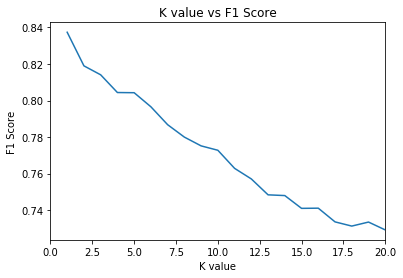

In [6]:
#create a KNN model with varying nearest neighbors as the baseline
#We chose to loop through values from 1 to 20 to assess the F1 scores the KNN algorithm
f1 = []
for i in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(train_data, train_data_label)
    y_dev_pred = knn_model.predict(dev_data)
    knn_f1 = round(metrics.f1_score(dev_data_label, y_dev_pred, average='macro'),4)
    f1.append(knn_f1)
    if (i == 1 or i % 2 == 0):
        print("k = ", i, "F1 of baseline model = " + str(knn_f1))
        print("")
        
plt.plot(range(1,21), f1)
plt.xlim(0,20)
plt.xlabel("K value")
plt.ylabel("F1 Score")
plt.title("K value vs F1 Score")

We can see that the F1 scores decline as K increases. We will use the baseline value of k = 1. The f1 score is .8374.

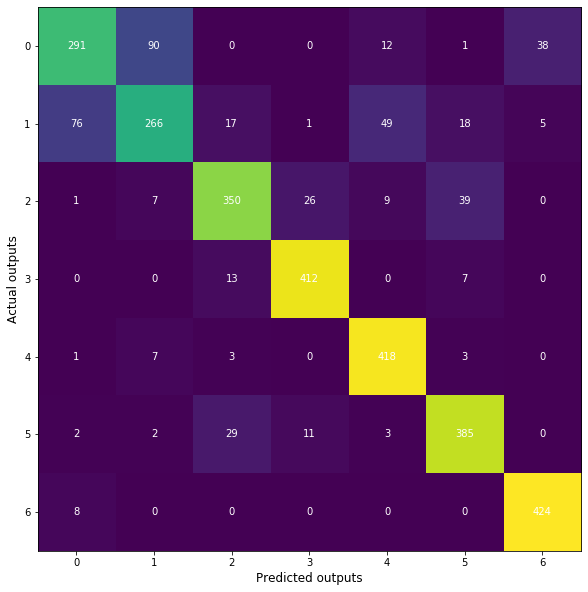

In [28]:
from sklearn.metrics import confusion_matrix
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(train_data, train_data_label)
y_pred_label = knn_model.predict(dev_data)
y_pred_prob = knn_model.predict_proba(dev_data)

dev_data_label_list = list(dev_data_label)
        
cm = confusion_matrix(dev_data_label, y_pred_label)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(7))
ax.yaxis.set(ticks=range(7))
ax.set_ylim(6.5, -0.5)
for i in range(7):
    for j in range(7):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()



The baseline model seems to confuse mostly 0 and 1s with each other

### EDA

There are twelve distinct features available to us:

1. **Elevation** - Elevation in meters 
2. **Aspect** - Aspect in degrees azimuth 
3. **Slope** - Slope in degrees 
4. **Horizontal_Distance_To_Hydrology** - Horzontal distance to nearest surface water features 
5. **Vertical_Distance_To_Hydrology** - Vertical distance to nearest surface water features 
6. **Horizontal_Distance_To_Roadways** - Horzontal distance to nearest roadway 
7. **Hillshade_9am (0 to 255 index)** - Hillshade distance at 9am, summer solstice 
8. **Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice 
9. **Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice 
10. **Horizontal_Distance_To_Fire_Points** - Horzontal distance to nearest wildfire ignition points 
11. **Wilderness_Area** (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation 
12. **Soil_Type** (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation 

Target is **Cover_Type** that designates forest cover type. The 7 cover types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [31]:
df[df.Cover_Type==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,2160.0,3128.025926,156.124988,2525.0,3036.00,3144.0,3234.00,3675.0
Aspect,2160.0,159.463426,117.280496,0.0,54.00,123.0,286.00,359.0
Slope,2160.0,13.112963,6.817153,1.0,8.00,12.0,17.00,41.0
Horizontal_Distance_To_Hydrology,2160.0,271.507407,221.250993,0.0,90.00,218.0,395.00,1129.0
Vertical_Distance_To_Hydrology,2160.0,41.281481,55.740461,-97.0,4.00,23.0,61.00,411.0
Horizontal_Distance_To_Roadways,2160.0,2579.715741,1495.176212,108.0,1380.00,2377.0,3601.25,6508.0
Hillshade_9am,2160.0,211.690278,25.399338,86.0,199.00,216.0,230.00,254.0
Hillshade_Noon,2160.0,223.248611,17.975428,125.0,214.00,226.0,236.00,254.0
Hillshade_3pm,2160.0,144.065741,36.114843,0.0,122.00,144.0,169.00,246.0
Horizontal_Distance_To_Fire_Points,2160.0,1994.412963,1249.350813,30.0,1080.25,1817.5,2642.00,6993.0


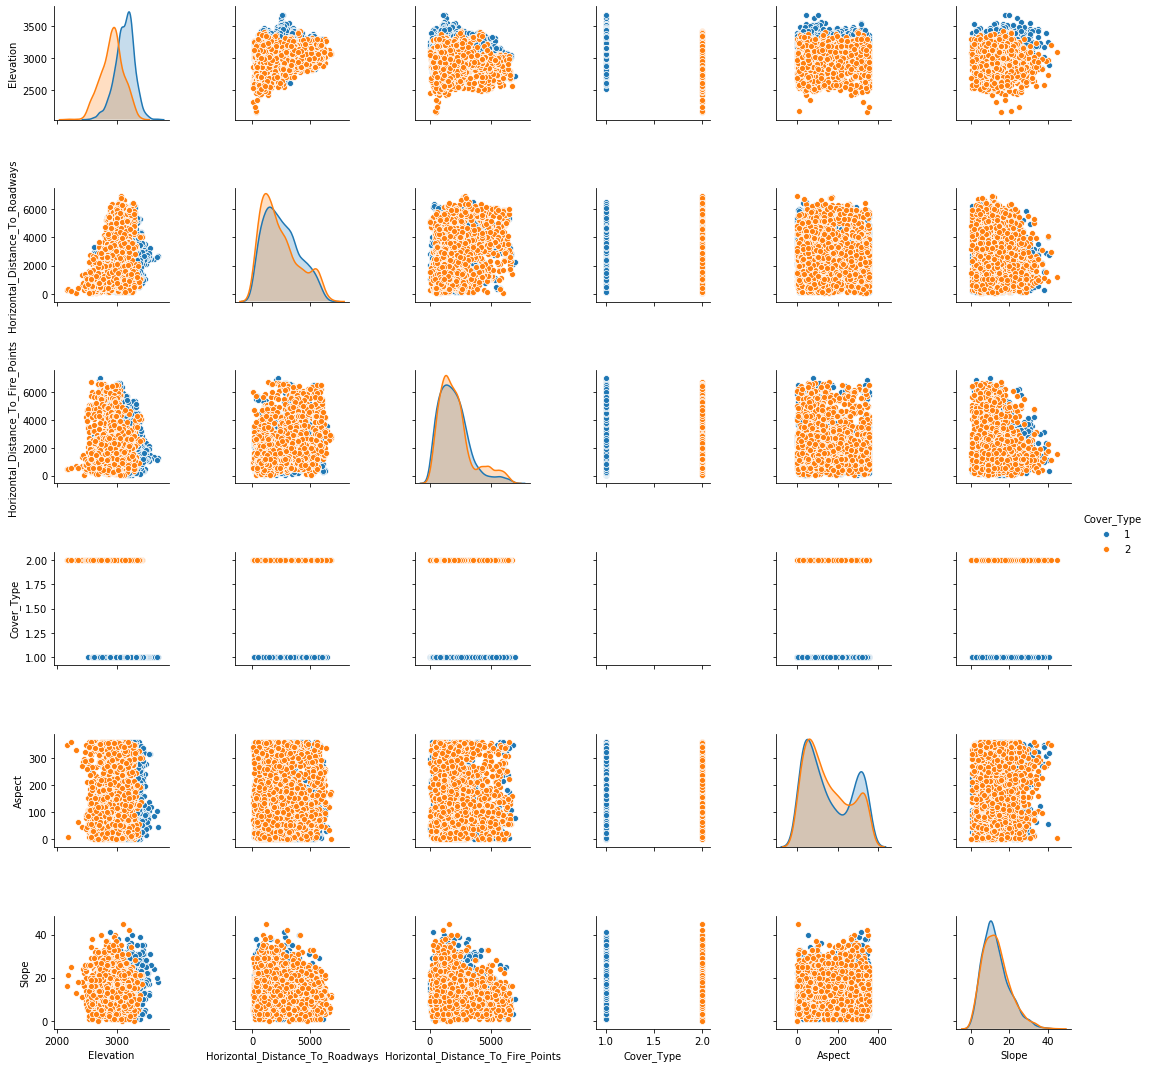

In [41]:
ex = df[["Elevation", "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points", "Cover_Type", "Aspect", "Slope"]]
ex1 = ex[(ex["Cover_Type"] == 1) | (ex["Cover_Type"] == 2)]

sns.pairplot(ex1, hue = "Cover_Type")

/Users/shalac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

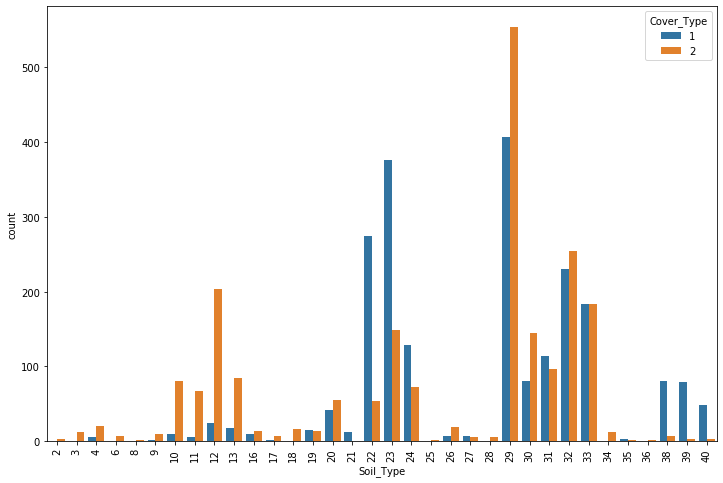

In [75]:
def only_1_2(df):
    limited_df = df[(ex["Cover_Type"] == 1) | (ex["Cover_Type"] == 2)]
    return limited_df
ex3 = only_1_2(df)
soil_cols = ex3.loc[:, "Soil_Type1":"Soil_Type40"]

def soil_factorize(row): 
    for x in soil_cols.columns:
        if row[x] == 1:
            return int(x.split("e")[1])

ex3["Soil_Type"] = soil_cols.apply(soil_factorize, axis =1)

plt.figure(figsize = (12,8))
sns.countplot(x = "Soil_Type", data = ex3, hue = "Cover_Type")
plt.xticks(rotation = 90)

In [ ]:
sns.pairplot(ex, hue = "Cover_Type")

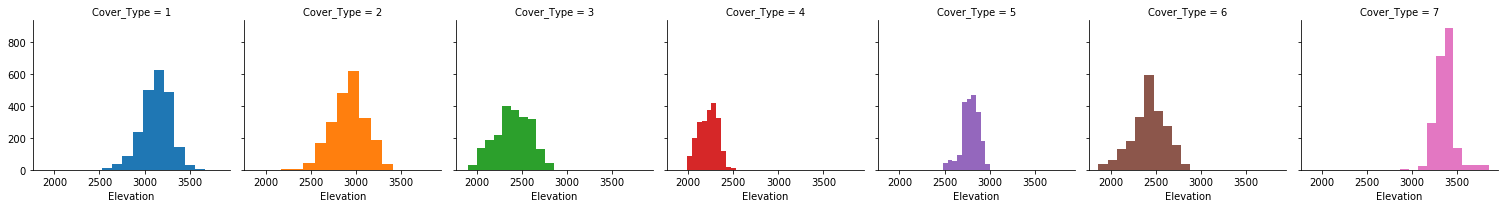

In [8]:
g = sns.FacetGrid(df, col="Cover_Type", hue = "Cover_Type")
g.map(plt.hist, "Elevation");

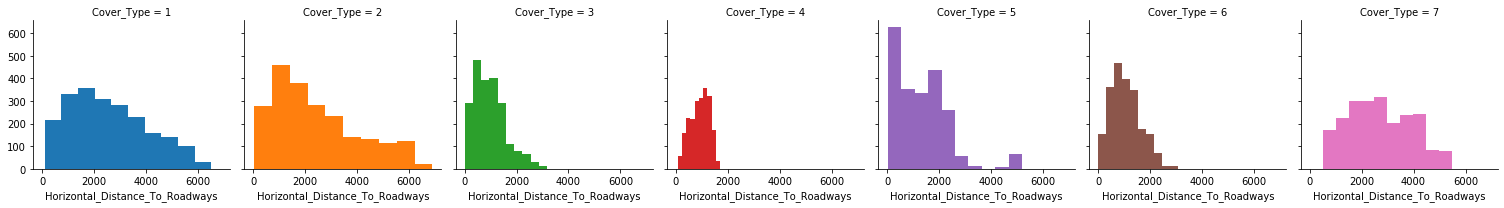

In [9]:
g = sns.FacetGrid(df, col="Cover_Type", hue = "Cover_Type")
g.map(plt.hist, "Horizontal_Distance_To_Roadways");

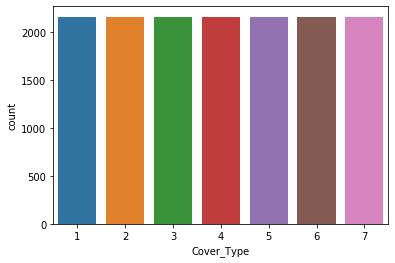

In [10]:
# Distribution of cover type
# Note - Need help on changing the xtick labels - it could look better
# https://realpython.com/python-histograms/
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html


sns.countplot(x ="Cover_Type", data = df)



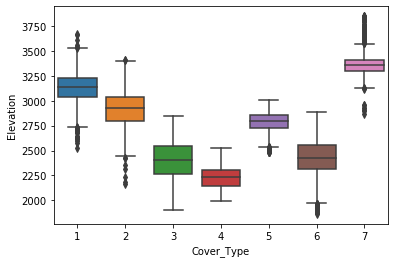

In [11]:
sns.boxplot(x=df['Cover_Type'], y=df["Elevation"], data=df)

### Soil type distribution

Soil type is represented as a binary feature in the data set There are 40 different features for each soil type.

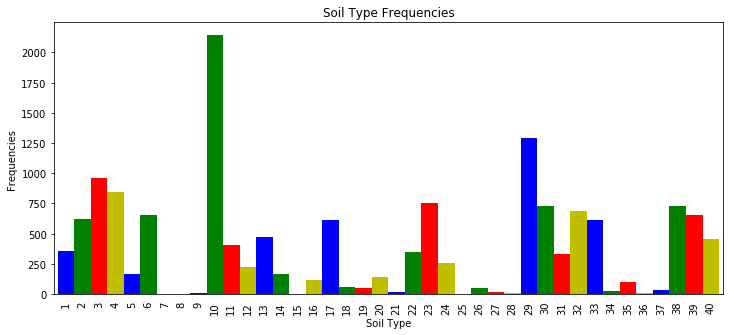

In [12]:
soil_df = df.loc[:,'Soil_Type1':'Soil_Type40']
soil_df.columns = range(1,41)
soil_series = soil_df.sum()
colors = ['b', 'g', 'r', 'y']

ax  = soil_series.plot(kind='bar', title = 'Soil Type Frequencies', width=1,figsize=(12, 5), color=colors)
ax.set_xlabel('Soil Type')
ax.set_ylabel('Frequencies')
ax.xaxis.set_ticks_position('none') 
plt.show()

## Data Cleaning

Let us remove ID since this has no significance in predicting cover type. Similarly, we remove soil types 7 and 15 as these have no values represented in data.

In [13]:
# Cleaning data by removing Id, Soil_Type7 and Soil_Type15

#train_data = train_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)
#dev_data = dev_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)
#test_data = test_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)


print('train_data shape: ',train_data.shape)
print('dev_data shape: ',dev_data.shape)
print('test_data shape: ',test_data.shape)


train_data shape:  (12096, 54)
dev_data shape:  (3024, 54)
test_data shape:  (565892, 54)


### Pre-processing Data

We used the Scikit-learn `Pipeline` class that applies a list of transformations to the data. We applied SimpleImputer, which replaces missing and `NAN` values with the `Median`, and a `StandardScaler` step, which subtracts the mean from each of the features and scales to unit variance. 

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.459435,-0.048570,1.240066,0.710974,2.272350,0.158238,0.953689,0.350988,-0.848744,-0.609228,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
1,0.284791,1.299527,-0.885929,-0.651024,-1.009344,-0.036874,-0.548954,0.789428,1.001114,-0.049528,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
2,0.425942,1.253983,-1.240262,-0.050983,-0.489472,2.538151,-0.287625,0.877116,0.848772,0.205616,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
3,0.184311,-0.112332,0.177069,-0.508157,-0.440733,0.405531,0.953689,0.657896,-0.457009,-0.300180,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
4,-0.456850,1.636551,-0.295375,-0.936758,-0.635686,0.217225,-0.842949,0.044080,0.783483,-0.890425,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12091,-1.016669,0.343107,1.121955,-0.651024,0.241599,-0.050487,-0.222292,1.359401,0.631142,-0.540051,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
12092,-1.468830,0.689240,1.121955,-0.627213,0.014155,-0.449786,-1.430940,1.447089,1.654004,-1.017997,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
12093,1.533618,0.170040,-0.767818,3.720704,1.638756,0.907680,0.431031,1.184024,0.348223,0.186750,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,4.480309,-0.214487,-0.177881
12094,0.966622,-1.114296,-0.531596,-0.365290,-0.765654,1.032461,0.169701,-0.218985,-0.108801,1.522663,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881


Normalize data

In [58]:
#normalize all values (subtract mean, divide by standard deviation) for non-categorical features


def normalize_processor(df):
    column_trans = ColumnTransformer(
    [('scaler', StandardScaler(),["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"])], remainder = "passthrough") 

    dfnorm = column_trans.fit_transform(df)
    dfnorm2 = pd.DataFrame(dfnorm, columns = df.columns)
    return dfnorm2


In [45]:

## why do we have a normalize processor and the standard scalar in the median processor?


### Feature Engineering 

We attempt to reduce complexity by creating features by combining existing ones to  optimize our model’s performance. In order to make the best possible prediction we need to make the most of the features we are given. This involves combining two or more significant features, or categorizing different ones to make them more digestable for the model. 

1.  **Euclidian distance to Hydration**
In the Random Forest model we observed that horizontal and vertical distance were both very important features. We believe that combining these features into one would influence the model. Incorporating this new feature we can drop the other 2 features. We use Euclidian distance to combine the features. This is the diagonal distance of the two features.
<br/><br/>
$$\sqrt{\sum_{i=1}^n (x_i-y_i)^2}$$

<br/><br/>

2.  **Soil Type** – We observed in the Random Forest model that soil types were individually not very important features. So we decided to aggregate these soil types to create three new features based on their textures: `soil_stony`, `soil_rubbly`, and `soil_other`
<br/><br/>
3. **Hillshade Mean** - We are given the Hillshade index at 9:00 am, noon, and 3:00 pm. Given this information, and the fact that our prior model gave importance to these features, we added another feature `Hillshade_mean`, which represents the average of these three indices.
<br/><br/>
$$ HillshadeMean = \frac{Hillshade9am + Hillshade3pm + HillshadeNoon}{3} $$


<br/><br/>

The data cleaning, feature selection, preprocessing steps, and the feature engineering are all performed in the function `feat_eng`. This will be run on both the training and testing data, to make sure the data are in sync.

In [62]:
def feat_eng(df):
    # Adding Hillshade_Mean Feature
    df['Hillshade_Mean'] =  (df['Hillshade_9am'] + df['Hillshade_Noon']  + df['Hillshade_3pm']) / 3
    
    # Adding Euclidian Distance
    
    #df['Euclidean_Dist_To_Hydrology'] =  np.sqrt(df['Horizontal_Distance_To_Hydrology'] **2 + df['Vertical_Distance_To_Hydrology'] **2 )
   # df['Euclidean_Dist_To_Hydrology'] =  np.sqrt((df['Horizontal_Distance_To_Hydrology']**2+df['Vertical_Distance_To_Hydrology']**2))
    
    # Categorizing Soil Types by texture
    stony_col = ['Soil_Type1', 'Soil_Type2', 'Soil_Type6', 'Soil_Type9', 'Soil_Type12', 'Soil_Type18', 'Soil_Type22', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
    rubbly_col = ['Soil_Type3','Soil_Type4', 'Soil_Type5', 'Soil_Type10', 'Soil_Type11', 'Soil_Type13']
    other_col = ['Soil_Type8', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type23', 'Soil_Type35']
    df['soil_stony'] = df[stony_col].sum(axis=1)
    df['soil_rubbly'] = df[rubbly_col].sum(axis=1)
    df['soil_other'] = df[other_col].sum(axis=1)    

    # ---------- Removing below features ---------
   # df = df.drop(['Id'], axis=1) # Removing 'Id' column
  #  df = df.drop(['Soil_Type7','Soil_Type15'], axis=1)

    return df

In [63]:
pre_processed_data = feat_eng(df)

X2, y = pre_processed_data.drop(["Cover_Type"], axis = 1), df["Cover_Type"]

X_preproc = median_processor(X2)
print(X_preproc.shape)

test_data_preproc = feat_eng(test_data)
test_data_preproc = median_processor(test_data_preproc)

(15120, 58)


In [64]:
X_preproc.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Hillshade_Mean,soil_stony,soil_rubbly,soil_other
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,...,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,0.666456,0.922319,-0.702272,-0.38547
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,...,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,0.763782,0.922319,-0.702272,-0.38547
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,...,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,0.783248,0.922319,-0.702272,-0.38547
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,...,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,0.608060,0.922319,-0.702272,-0.38547
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,...,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,0.724852,0.922319,-0.702272,-0.38547


### Decision Trees for Feature Selection

#### Start with one tree

In [52]:
# create a baseline random forest using all the features 


RF_baseline = RandomForestClassifier(min_samples_split = 2, n_estimators = 200, max_depth = 20)
RF_baseline.fit(train_data, train_data_label) # Fitting the train data to the classifier 
#predict = RF_baseline.predict(test_data)
RF_pred = RF_baseline.predict(dev_data)
RF_f1 = metrics.f1_score(dev_data_label, RF_pred, average='macro')
print("F1 score of baseline Random Forest = " + str(RF_f1))

F1 score of baseline Random Forest = 0.8491421044121733


In [53]:
# Important features of the random forest

importances = RF_baseline.feature_importances_
indices = np.argsort(importances)[::-1] 
print("Random Forest top impportant features")
importances_df = pd.DataFrame(columns=['Rank','Feature', 'Importance'])

for i in range(len(indices)):
    importance = np.around(importances[indices[i]],decimals=4)
    feature = train_data.columns[indices[i]]
    rank = i + 1
    importances_df.loc[i] = [rank, feature, importance]


# List the feature importances of the forest

importances_df

Random Forest top impportant features


,Rank,Feature,Importance
0,1,Elevation,0.2291
1,2,Horizontal_Distance_To_Roadways,0.0897
2,3,Horizontal_Distance_To_Fire_Points,0.0695
3,4,Horizontal_Distance_To_Hydrology,0.0608
4,5,Wilderness_Area4,0.0530
5,6,Vertical_Distance_To_Hydrology,0.0527
6,7,Hillshade_9am,0.0498
7,8,Aspect,0.0467
8,9,Hillshade_3pm,0.0436
9,10,Hillshade_Noon,0.0421


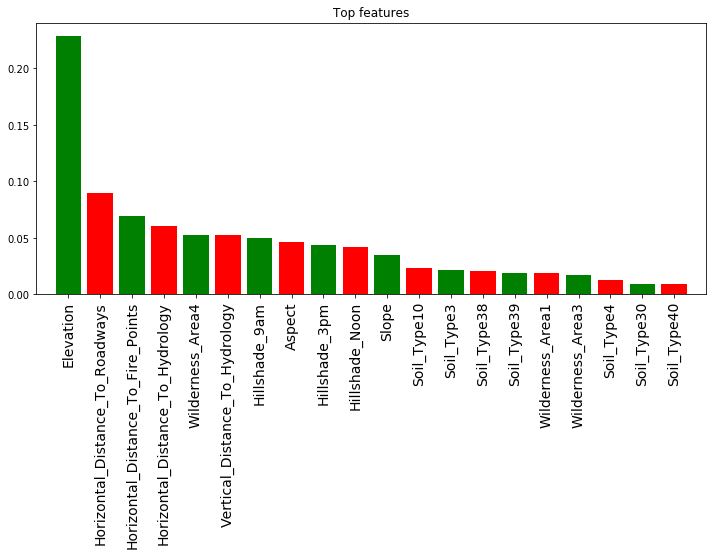

In [54]:
# Plot the feature importances of the forest
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

indices=indices[:20] 
plt.figure(figsize = (12,5)) 
plt.title("Top features") 
plt.bar(range(20), importances[indices], color="gr", align="center") 
plt.xticks(range(20), train_data.columns[indices], fontsize=14, rotation=90) 
plt.xlim([-1, 20]) 
plt.show()


Processor that keeps only most important features

In [55]:

#train_data[]

In [56]:
# returns a dataframe with subset of n most important features based on RF model
def rf_feature_selector(df, n_features):
    df1 = df[importances_df['Feature'][:n_features]]
    return df1

The Random Forest baseline model performs well on the training data, with a 0.85 F1 score.

Elevation is exteremly significant, followed by Horizontal distance to Roadways, Fire points and Hydrology. 

## Pre-processed Data Sets

In [76]:
train_data_norm = normalize_processor(train_data)
train_data_rf_selector = rf_feature_selector(train_data,15)
train_data_feat_eng = feat_eng(train_data)
train_data_1_2 = only_1_2(train_data)

dev_data_norm = normalize_processor(dev_data)
dev_data_rf_selector = rf_feature_selector(dev_data,15)
dev_data_feat_eng = feat_eng(dev_data)
dev_data_1_2 = only_1_2(dev_data)

train_datasets = [train_data,  train_data_norm, train_data_rf_selector,  train_data_feat_eng, train_data_1_2]

dev_datasets = [dev_data, dev_data_norm, dev_data_rf_selector, dev_data_feat_eng, dev_data_1_2]

transformation_names = ["None",  "Normalize", "Feat Selector RF","Feat Eng","Only Types 1 & 2"]


/Users/shalac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shalac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shalac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

## Decision Tree

In [66]:
import time
index = np.array(range(80))
model_performance_df = pd.DataFrame(columns = ['Model Name', 'Train Time(s)', 'Prediction Time(s)', 'F1 Score', 'Pre-processor'], index = index)

from sklearn import tree
loc1 = 0
for ds in range(len(train_datasets)):
    clf = tree.DecisionTreeClassifier(max_depth = 20)
    start_train = time.time()
    clf = clf.fit(train_datasets[ds], train_data_label)
    end_time = time.time()
    train_time = str(round(end_time - start_train, 2))
    
    start_test = time.time()
    tree_pred= clf.predict(dev_datasets[ds])
    end_test = time.time()
    test_time = str(round(end_test - start_test, 2))
    accuracy = round(metrics.f1_score(dev_data_label, tree_pred, average="macro"),3)
    print("Transformation:", transformation_names[ds], "F1 Score = " + str(accuracy))
    model_performance_df.iloc[loc1] = ['Decision Trees', train_time, test_time, accuracy, transformation_names[ds]]
    loc1 +=1 

Transformation: None F1 Score = 0.787
Transformation: Median Pre-processor F1 Score = 0.787
Transformation: Normalize F1 Score = 0.788
Transformation: Feat Selector RF F1 Score = 0.75
Transformation: Feat Eng F1 Score = 0.789
Transformation: Norm Feat Eng F1 Score = 0.785


## Random Forest With Processed Data

In [67]:
# Mohan changed this cell

RF_revised = RandomForestClassifier(min_samples_split = 2, n_estimators = 200, max_depth = 20)
for ds in range(len(train_datasets)):
    RF_revised.fit(train_datasets[ds], train_data_label) # Fitting the train data to the classifier 
    #predict = RF_revised.predict(test_data)
    RF_revised_pred = RF_revised.predict(dev_datasets[ds])
    RF_revised_f1 = round(metrics.f1_score(dev_data_label, RF_revised_pred, average='macro'),3)
    print("Transformation:", transformation_names[ds])
    print("F1 score of revised Random Forest = " + str(RF_revised_f1))

Transformation: None
F1 score of revised Random Forest = 0.846
Transformation: Median Pre-processor
F1 score of revised Random Forest = 0.849
Transformation: Normalize
F1 score of revised Random Forest = 0.85
Transformation: Feat Selector RF
F1 score of revised Random Forest = 0.83
Transformation: Feat Eng
F1 score of revised Random Forest = 0.842
Transformation: Norm Feat Eng
F1 score of revised Random Forest = 0.848


## Extra trees

Extra trees add a layer of randomization to decision tree modeling. It takes into account the whole learning sample.

We use GridSearchCV to find the optimal parameters. 

In [9]:
# NOTE - this step takes time - implement only once

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

params = {'max_features': [0.8, 1], 'n_estimators': [10,20,50,100], 'max_depth': [10, 20, 30]}

clf = GridSearchCV(ExtraTreesClassifier(), params)


clf.fit(train_data, train_data_label)
print("Best parameters:", clf.best_params_) 

Best parameters: {'max_depth': 30, 'max_features': 0.8, 'n_estimators': 100}


6

In [68]:
for ds in range(len(train_datasets)):
    loc1 = model_performance_df['Model Name'].notna()[::-1].idxmax()+1
    ExtraTree_clf = ExtraTreesClassifier(max_features=0.8, max_depth = 30, n_estimators=500)

    ExtraTree_clf.fit(train_datasets[ds], train_data_label) # Fitting the train data to the classifier   
    # Make prediction on dev data
    start_test = time.time()
    pred = ExtraTree_clf.predict(dev_datasets[ds])
    end_test = time.time()
    test_time = str(round(end_test - start_test, 2))

    # Store metrics
    dev_f1 = round(metrics.f1_score(dev_data_label, pred, average='macro'), 3)
   # print("F1 Score for Extra Trees = " + str(dev_f1))
    model_performance_df.iloc[loc1] = ['Extra Trees', train_time, test_time, dev_f1, transformation_names[ds]]
    ##We need to adjust this DF to account for all the versions, unless we just get the max one
    
    print("Transformation:", transformation_names[ds], dev_f1)
   



Transformation: None 0.87
Transformation: Median Pre-processor 0.873
Transformation: Normalize 0.874
Transformation: Feat Selector RF 0.856
Transformation: Feat Eng 0.872
Transformation: Norm Feat Eng 0.872


## XGBoost (Extreme Gradient Boosting)

XGBoost uses gradient descent to compensate for some of the downsides of the previous decision tree model. It builds trees in series, and increases weights of incorrectly classified nodes, while decreasing those of the correctly classified. This uses the concept of "boosting" to continually improve a model by focusing on missclassifications.

In [31]:
import xgboost as xgb

params = {'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [50,100,200,500], 'max_depth': [10, 20, 30]}
clf = GridSearchCV(xgb.XGBClassifier(), params)

for ds in range(len(train_datasets)):
    clf.fit(train_datasets[ds], train_data_label)
    print("Transformation:", transformation_names[ds])
    print("Best parameters:", clf.best_params_) 

KeyboardInterrupt: 

In [32]:
# I have implemented the classifier on only one of the preprocessed training data set
# We'll need to abstract into a method and put into a loop so that we can look at f1_score from each preprocessing method
# Can I defer this to one of you with better programming skills? It'll save me a few hours...
for ds in range(len(train_datasets)):
    loc1 = model_performance_df['Model Name'].notna()[::-1].idxmax()+1
    xgb_clf = xgb.XGBClassifier(max_depth = 10, n_estimators = 50, learning_rate = 0.1)

    start_train = time.time()
    xgb_clf.fit(train_datasets[ds], train_data_label) # Fitting the train data to the classifier   
    end_train = time.time()
    train_time = str(round(end_train - start_train, 2))

    # Make prediction on dev data
    start_test = time.time()
    pred = xgb_clf.predict(dev_datasets[ds])
    end_test = time.time()
    test_time = str(round(end_test - start_test, 2))

    # Store metrics
    dev_f1 = round(metrics.f1_score(dev_data_label, pred, average='macro'), 3)
    print("Transformation:", transformation_names[ds], "F1 Score = " + str(dev_f1))
    model_performance_df.iloc[loc1] = ['Extreme Gradient Boost', train_time, test_time, dev_f1, transformation_names[ds]]
    

Transformation: None F1 Score = 0.835
Transformation: Median Pre-processor F1 Score = 0.837
Transformation: Normalize F1 Score = 0.837
Transformation: Feat Selector RF F1 Score = 0.822
Transformation: Feat Selector L1 Reg F1 Score = 0.64
Transformation: Feat Eng F1 Score = 0.835
Transformation: Norm Feat Eng F1 Score = 0.831


## SVM - Mohan 

Support Vector Machines are a fast supervised learning model that perform non-linear classification. 

In [ ]:
# NOTE - this step takes time - implement only once
#THIS IS TOO SLOW..
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.05], 'C': [1, 10, 50, 100]}
clf = GridSearchCV(SVC(), params)
C_list = []
gamma_list = []

for ds in range(len(train_datasets)):
    clf.fit(train_datasets[ds], train_data_label)
    print("Transformation:", transformation_names[ds])
    print("Best parameters:", clf.best_params_) 
    C_list.append(clf.best_params_['C'])
    gamma_list.append(clf.best_params_['gamma'])


In [ ]:
print(gamma_list)

In [33]:
# Pipeline for fitting model, making predictions, and saving performance metrics
# Using the values for the params from the grid search above
# SVM F1 score is very low for some reason
from sklearn.svm import SVC

svm_clf =  SVC(kernel="rbf", gamma=.1, C=50)
for ds in range(len(train_datasets)):
    loc1 = model_performance_df['Model Name'].notna()[::-1].idxmax()+1

    start_train = time.time()
    svm_clf.fit(train_datasets[ds], train_data_label) # Fitting the train data to the classifier   
    end_train = time.time()
    train_time = str(round(end_train - start_train, 2))

    # Make prediction on dev data
    start_test = time.time()
    pred = svm_clf.predict(dev_datasets[ds])
    end_test = time.time()
    test_time = str(round(end_test - start_test, 2))

    # Store metrics
    dev_f1 = round(metrics.f1_score(dev_data_label, pred, average='macro'), 3)
    print("Transformation:", transformation_names[ds], "F1 Score = " + str(dev_f1))
    model_performance_df.iloc[loc1] = ['SVM', train_time, test_time, dev_f1, transformation_names[ds]]

/Users/shalac/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Transformation: None F1 Score = 0.038
Transformation: Median Pre-processor F1 Score = 0.829
Transformation: Normalize F1 Score = 0.836


/Users/shalac/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Transformation: Feat Selector RF F1 Score = 0.038
Transformation: Feat Selector L1 Reg F1 Score = 0.478


/Users/shalac/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Transformation: Feat Eng F1 Score = 0.038
Transformation: Norm Feat Eng F1 Score = 0.831


In [ ]:
params = {'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.05], 'C': [1, 10, 50, 100]}
clf = GridSearchCV(SVC(), params)

clf.fit(train_data, train_data_label)
print("Best parameters:", clf.best_params_) 

In [34]:
# Pipeline for fitting model, making predictions, and saving performance metrics
# Using the values for the params from the grid search above
# My SVM is busted 

svm_clf =  SVC(kernel="rbf", gamma=.5, C=10)
for ds in range(len(train_datasets)):
    loc1 = model_performance_df['Model Name'].notna()[::-1].idxmax()+1
    start_train = time.time()
    svm_clf.fit(train_datasets[ds], train_data_label) # Fitting the train data to the classifier   
    end_train = time.time()
    train_time = str(round(end_train - start_train, 2))

    # Make prediction on dev data
    start_test = time.time()
    pred = svm_clf.predict(dev_datasets[ds])
    end_test = time.time()
    test_time = str(round(end_test - start_test, 2))

    # Store metrics
    dev_f1 = round(metrics.f1_score(dev_data_label, pred, average='macro'), 3)
    print("Transformation:", transformation_names[ds], "F1 Score = " + str(dev_f1))
    model_performance_df.iloc[loc1] = ['SVM-2', train_time, test_time, dev_f1, transformation_names[ds]]

/Users/shalac/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Transformation: None F1 Score = 0.04
Transformation: Median Pre-processor F1 Score = 0.82
Transformation: Normalize F1 Score = 0.837


/Users/shalac/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Transformation: Feat Selector RF F1 Score = 0.042
Transformation: Feat Selector L1 Reg F1 Score = 0.418


/Users/shalac/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Transformation: Feat Eng F1 Score = 0.04
Transformation: Norm Feat Eng F1 Score = 0.833


### Gradient Descent

### Ensemble

### Re-run KNN

In [72]:
loc1-=7

Transformation: None 0.8353
Transformation: Median Pre-processor 0.7996
Transformation: Normalize 0.7963
Transformation: Feat Selector RF 0.8371
Transformation: Feat Selector L1 Reg 0.3974
Transformation: Feat Eng 0.8353
Transformation: Norm Feat Eng 0.7881


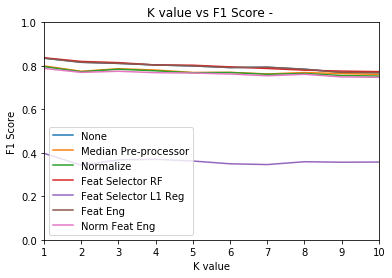

In [36]:
#create a KNN model with varying nearest neighbors as the baseline
#We chose to loop through values from 1 to 20 to assess the F1 scores the KNN algorithm


for ds in range(len(train_datasets)):
    loc1 = model_performance_df['Model Name'].notna()[::-1].idxmax()+1
    f1_2 = []
    for i in range(1,11):
        knn_model_2 = KNeighborsClassifier(n_neighbors = i)
        start_train = time.time()
        knn_model_2.fit(train_datasets[ds], train_data_label)
        end_train = time.time()
        train_time = str(round(end_train - start_train, 2))
        
        start_test = time.time()
        y_dev_pred = knn_model_2.predict(dev_datasets[ds])
        end_test = time.time()
        test_time = str(round(end_test - start_test, 2))
        knn_f1_2 = round(metrics.f1_score(dev_data_label, y_dev_pred, average='macro'),4)
        f1_2.append(knn_f1_2)
        #print("Transformation:", transformation_names[ds])
        #print("F1 score of baseline knn = " + str(knn_f1_2))
    print("Transformation:", transformation_names[ds], max(f1_2))
    plt.plot(range(1,11), f1_2)
    plt.xlim(1,10)
    plt.ylim(0,1)
    plt.xlabel("K value")
    plt.ylabel("F1 Score")
    plt.title("K value vs F1 Score - ")#, transformation_names[ds])
    plt.legend(transformation_names)
    model_performance_df.iloc[loc1] = ['KNN', train_time, test_time, dev_f1, transformation_names[ds]]
    


## DF with all models

In [37]:
model_performance_df.sort_values(by=['F1 Score'], ascending= False)[:50]

,Model Name,Train Time(s),Prediction Time(s),F1 Score,Pre-processor
8,Extra Trees,0.13,0.3,0.875,Median Pre-processor
9,Extra Trees,0.13,0.37,0.873,Normalize
12,Extra Trees,0.13,0.32,0.869,Feat Eng
13,Extra Trees,0.13,0.3,0.869,Norm Feat Eng
7,Extra Trees,0.13,0.31,0.868,None
10,Extra Trees,0.13,0.32,0.849,Feat Selector RF
15,Extreme Gradient Boost,21.61,0.08,0.837,Median Pre-processor
30,SVM-2,7.05,1.23,0.837,Normalize
16,Extreme Gradient Boost,22.23,0.08,0.837,Normalize
23,SVM,3.53,0.92,0.836,Normalize


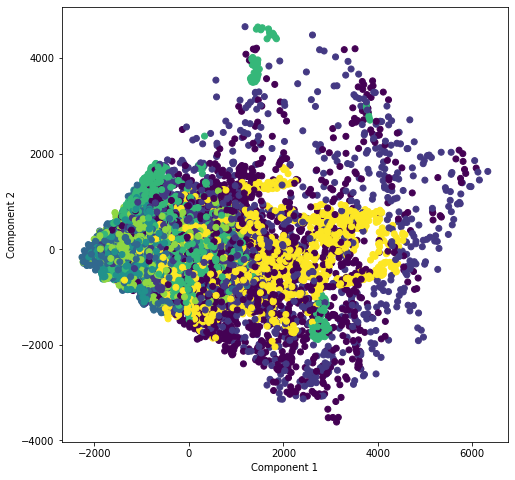

In [75]:
from sklearn.decomposition import PCA

pca2d = PCA(n_components = 2)
principal_components = pca2d.fit_transform(train_data)
principalDf = pd.DataFrame(data = principal_components
             , columns = ['component1', 'component2'])

fig = plt.figure(figsize=(8, 8))
plt.scatter(principalDf.component1, principalDf.component2, c = train_data_label)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()



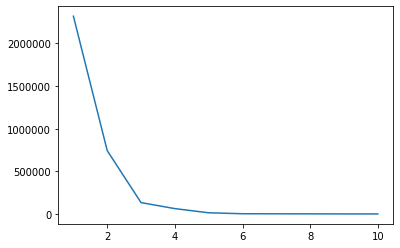

In [76]:
k = range(1,11)
var = []

for k in k:
    pca = PCA(n_components = k)
    pca = pca.fit(train_data)
    ex_var = pca.explained_variance_
    #print("k : ", k, "\n ex_var: ", ex_var)
    #principalDf = pd.DataFrame(data = principal_components
    #        , columns = ['component1', 'component2'])
    
plt.plot(range(1,11), ex_var)

In [85]:
from sklearn.cluster import KMeans

pca3d = PCA(n_components = 2)
principal_components = pca3d.fit_transform(train_data)
kmeans = KMeans(n_clusters = 7).fit(principal_components)
dev_components = pca3d.fit_transform(dev_data)
y_dev_pred = kmeans.predict(dev_components)
kmeans_accuracy = round(metrics.accuracy_score(dev_data_label, y_dev_pred),4)
print(kmeans_accuracy)



0.1941


AttributeError: 'GridSearchCV' object has no attribute 'tree_'

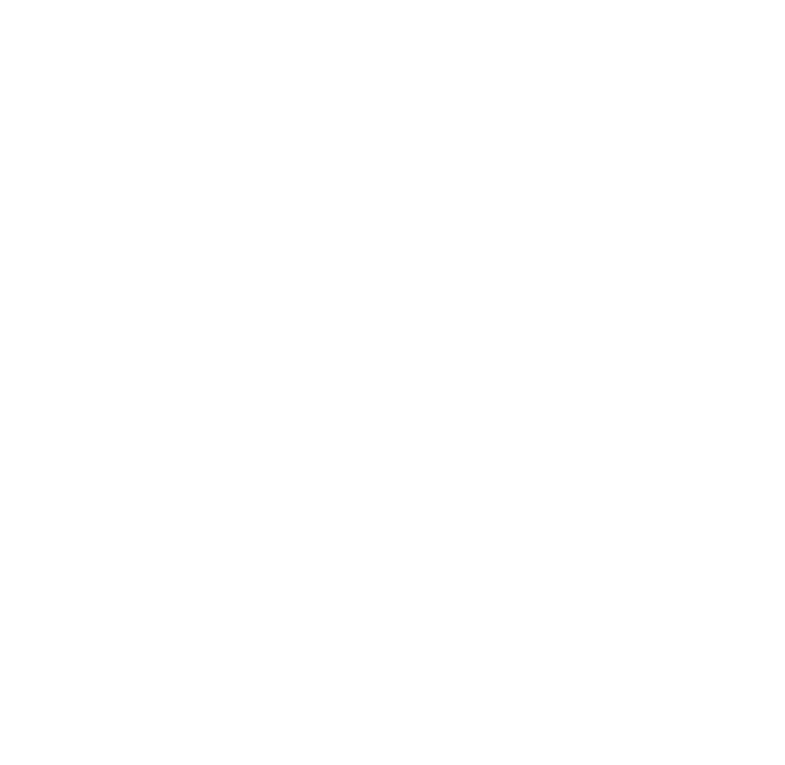

In [78]:
%matplotlib inline
plt.figure(figsize = (20, 20), dpi = 50)
tree.plot_tree(clf, fontsize =12, feature_names=train_data.columns,rotate = True) 

plt.show()

In [ ]:
import graphviz 
import pydotplus
import matplotlib.image as mpimg
import io
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

%matplotlib inline
plt.figure(figsize = (20, 20))
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=train_data.columns,  
                     # class_names=iris.target_names,  
                      filled=True, rounded=False,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


In [ ]:
model_performance_df['Model Name'].notna()[::-1].idxmax()

In [123]:
soil_cols = df.loc[:, "Soil_Type1":"Soil_Type40"]

def soil_factorize(row): 
    for x in soil_cols.columns:
        if row[x] == 1:
            return int(x.split("e")[1])

df["Soil_Type"] = soil_cols.apply(soil_factorize, axis =1)

In [141]:
wild_cols = df.loc[:, "Wilderness_Area1":"Wilderness_Area4"]

def wild_factorize(row): 
    for x in wild_cols.columns:
        if row[x] == 1:
            return int(x.split("Area")[1])

df["Wilderness_Area"] = wild_cols.apply(wild_factorize, axis =1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

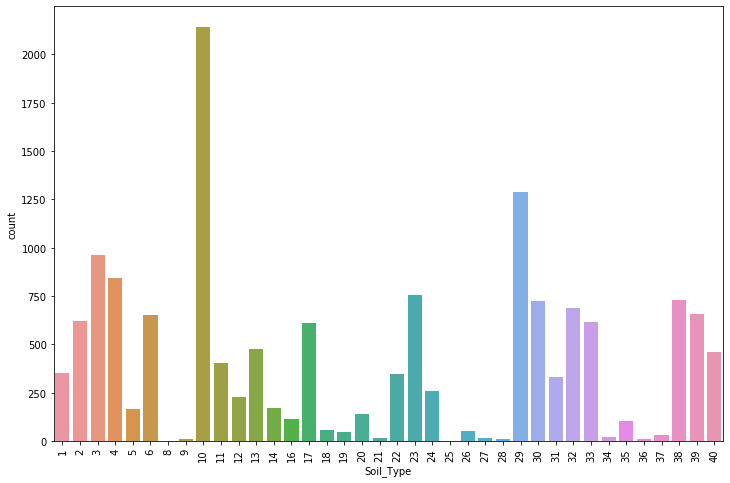

In [124]:
plt.figure(figsize = (12,8))
sns.countplot(x = "Soil_Type", data = df)
plt.xticks(rotation = 90)

In [142]:
X2, y2 = df.drop(["Cover_Type", 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Wilderness_Area1', 'Wilderness_Area2',
                  'Wilderness_Area3', 'Wilderness_Area4'], axis = 1), df["Cover_Type"]

train_data2, dev_data2, train_data_label2, dev_data_label2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify = y2)


k =  1 Accuracy of baseline model = 0.8403

k =  2 Accuracy of baseline model = 0.8194

k =  4 Accuracy of baseline model = 0.8108

k =  6 Accuracy of baseline model = 0.8006

k =  8 Accuracy of baseline model = 0.7937

k =  10 Accuracy of baseline model = 0.7781

k =  12 Accuracy of baseline model = 0.7682

k =  14 Accuracy of baseline model = 0.7649

k =  16 Accuracy of baseline model = 0.7513

k =  18 Accuracy of baseline model = 0.7474

k =  20 Accuracy of baseline model = 0.7411



Text(0, 0.5, 'Accuracy Score')

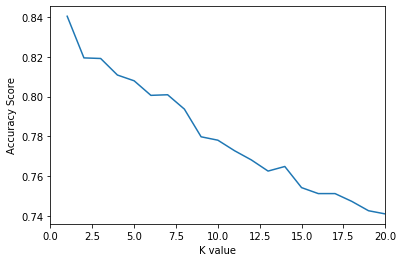

In [148]:
f1 = []
for i in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(train_data2, train_data_label2)
    y_dev_pred = knn_model.predict(dev_data2)
    knn_f1 = round(metrics.accuracy_score(dev_data_label2, y_dev_pred),4)
    f1.append(knn_f1)
    if (i == 1 or i % 2 == 0):
        print("k = ", i, "Accuracy of baseline model = " + str(knn_f1))
        print("")
        
plt.plot(range(1,21), f1)
plt.xlim(0,20)
plt.xlabel("K value")
plt.ylabel("Accuracy Score")

In [138]:
x = "Wilderness_Area10"
int(x.split("Area")[1])

10

In [143]:
train_data2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Hillshade_Mean,Euclidean_Dist_To_Hydrology,soil_stony,soil_rubbly,soil_other,Soil_Type,Wilderness_Area
14128,2942,151,27,376,191,1928,242,227,96,837,188.333333,421.730957,0,1,0,13,3
4425,2869,299,9,90,-11,1670,196,237,181,1460,204.666667,90.669730,0,0,1,23,3
909,2928,294,6,216,21,5075,204,239,174,1744,205.666667,217.018432,0,0,1,23,1
5123,2827,144,18,120,24,2255,242,234,114,1181,196.666667,122.376468,0,1,0,13,3
10901,2559,336,14,30,12,2006,187,220,171,524,192.666667,32.310989,0,1,0,10,3


In [132]:
soil_cols.columns

Index(['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],
      dtype='object')

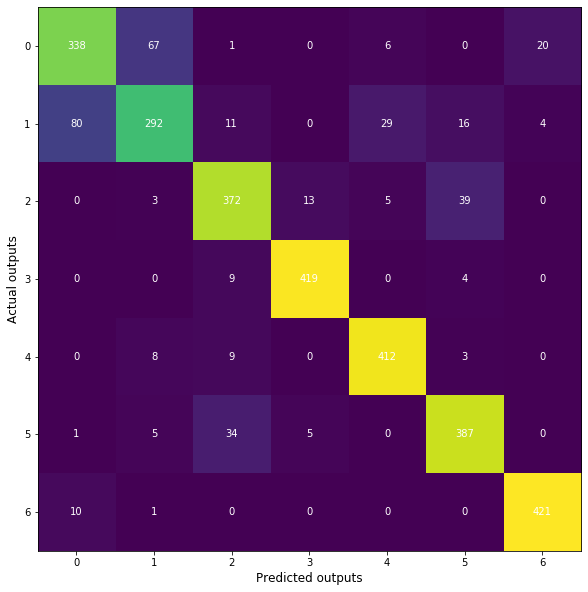

In [73]:
ExtraTree_clf = ExtraTreesClassifier(max_features=0.8, max_depth = 30, n_estimators=500)

ExtraTree_clf.fit(train_data, train_data_label) # Fitting the train data to the classifier   
    # Make prediction on dev data
    
pred = ExtraTree_clf.predict(dev_data)
    

#y_pred_prob = knn_model.predict_proba(dev_data)

        
cm = confusion_matrix(dev_data_label, pred)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(7))
ax.yaxis.set(ticks=range(7))
ax.set_ylim(6.5, -0.5)
for i in range(7):
    for j in range(7):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

